**Q1.`Delivery_time -> Predict delivery time using sorting time`Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.**

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')


In [21]:
delivery_data=pd.read_csv("delivery_time.csv")

In [22]:
delivery_data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## EDA and Data Visualization

In [23]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [24]:
delivery_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## Correlation Analysis

In [25]:
delivery_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

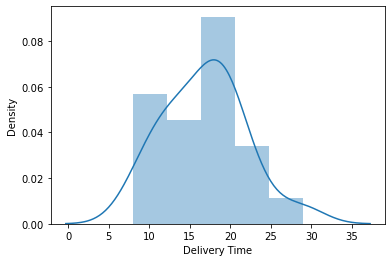

In [26]:
sns.distplot(delivery_data["Delivery Time"])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

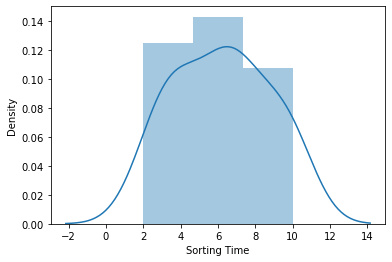

In [27]:
sns.distplot(delivery_data["Sorting Time"])

## Feature Engineering

In [28]:
# Renaming Columns
delivery_data=delivery_data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
delivery_data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Model Building

# Basic Model

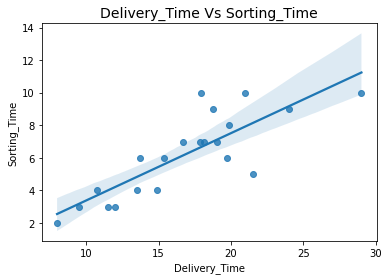

In [29]:
sns.regplot(x='Delivery_Time', y='Sorting_Time', data= delivery_data)
plt.title('Delivery_Time Vs Sorting_Time', fontsize = 14)
plt.show()


In [30]:
linear_model = smf.ols('Delivery_Time~Sorting_Time', data = delivery_data).fit()

In [31]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        12:24:04   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predicitng from original model without any data transformation

In [32]:
predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = delivery_data.Sorting_Time
predicted1['Delivery_Time'] = delivery_data.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(linear_model.predict(predicted1))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


## Applying different transformation on data 

## 1. By Using  Log Transformation On Data

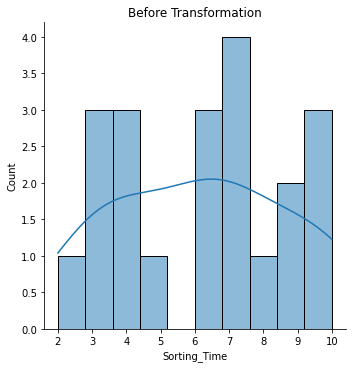

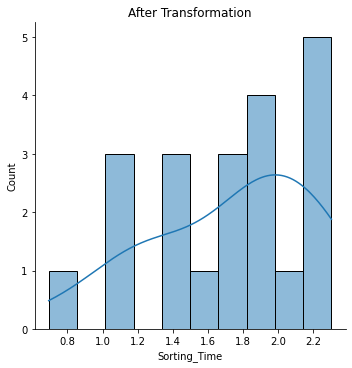

In [33]:
sns.displot(delivery_data['Sorting_Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(delivery_data['Sorting_Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

Text(0.5, 1.0, 'Log transformation')

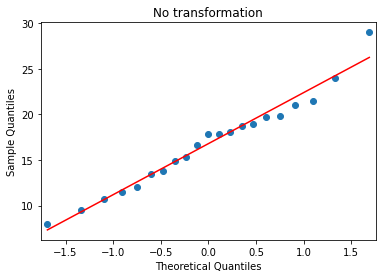

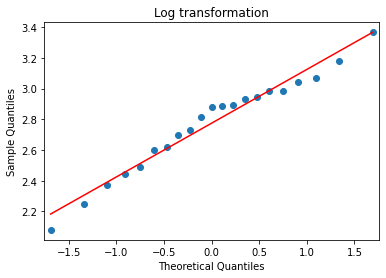

In [34]:
sm.qqplot(delivery_data['Delivery_Time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(delivery_data['Delivery_Time']), line = 'r')
plt.title('Log transformation')

## Fitting a Linear Regression Model
## Using Ordinary Least Squares (OLS) 

In [35]:
linear_model1 = smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = delivery_data).fit()

In [36]:
linear_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Mon, 06 Mar 2023   Prob (F-statistic):           1.60e-07
Time:                           12:24:06   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. By using Square Root Transformation On Data

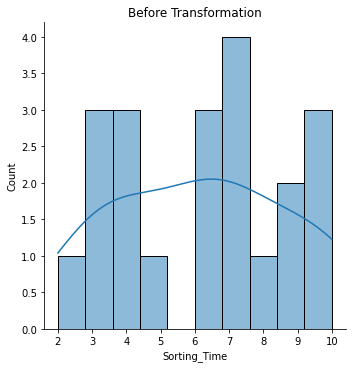

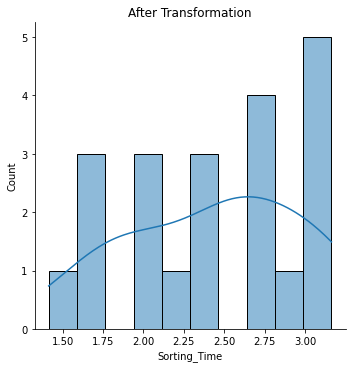

In [37]:
sns.displot(delivery_data['Sorting_Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.sqrt(delivery_data['Sorting_Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()


Text(0.5, 1.0, 'square root transformation')

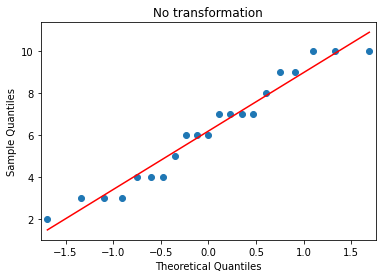

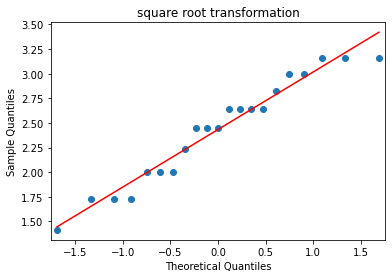

In [38]:
sm.qqplot(delivery_data['Sorting_Time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.sqrt(delivery_data['Sorting_Time']), line = 'r')
plt.title('square root transformation')

In [39]:
linear_model2 = smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = delivery_data).fit()

In [40]:
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Mon, 06 Mar 2023   Prob (F-statistic):           8.48e-07
Time:                            12:24:07   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 3. By Using  Cube Root Transformation

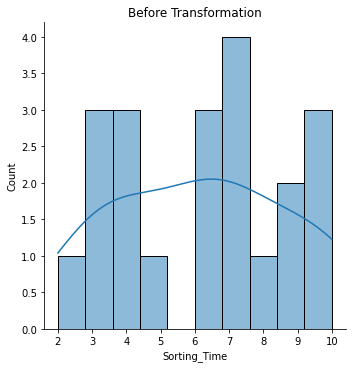

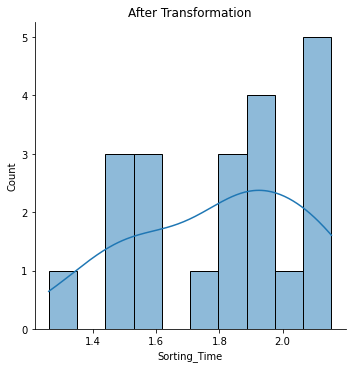

In [41]:
sns.displot(delivery_data['Sorting_Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.cbrt(delivery_data['Sorting_Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()


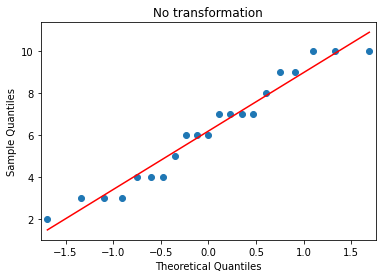

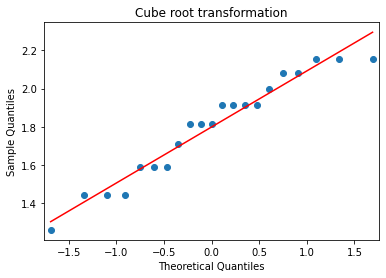

In [42]:
sm.qqplot(delivery_data['Sorting_Time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.cbrt(delivery_data['Sorting_Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [43]:
linear_model3 = smf.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = delivery_data).fit()

In [44]:
linear_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Mon, 06 Mar 2023   Prob (F-statistic):           4.90e-07
Time:                            12:24:09   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As 'Linear Model1' has the  highest Adjusted R-squared score. Hence, we are going to use Linear 'Linear Model2' to predict our values.**

**'Linear Model1' is the model where we did log transformation on both dependent variable as well as on independent variable.**

## Predicting values from model with log transformation on the data

In [45]:
predicted2 = pd.DataFrame()
predicted2['Sorting_Time'] = delivery_data.Sorting_Time
predicted2['Delivery_Time'] = delivery_data.Delivery_Time
predicted2['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(linear_model1.predict(predicted2.Sorting_Time)))
predicted2


,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593
